<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/Bloques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &> /dev/null
from bioinfokit.analys import stat as st
!pip install pingouin &> /dev/null
import pingouin as pg

#  **Tema : Diseños en Bloques Completos al Azar - DBCA usando Python: Versión 2**</span>

### <span style="color:blue"> **Problema: _En una empresa se tienen varios silos para almacenar leche (tanques de 10,000 litros) Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello durante cinco días se decide registrar la temperatura a cierta hora crítica. La temperatura de una día a otro puede ser una fuente de variabilidad que podría impactar la variabilidad total_.**</span>

### <span style="color:blue">**Tabla de datos**</span>


|SILOS|Lunes|Martes|Miercoles|Jueves|Viernes|
|:--:|:--:|:--:|:--:|:--:|:--:|
|A|3|2.5|2|3|2|
|B|4|3|2|3.5| 3.5|
|C|4.5|4|3.5|5.5| 5|
|D|2.5|2|3|3| 2.5|
|E|3.5|4|3.5|3|3|


- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{T_1}=\mu_{T_2}=\mu_{T_3}=\mu_{T_4}$$ $$Vs$$ $$H_{a1}: \mu_{T_i}\neq\mu_{T_j}$$ _Al menos un tratamiento(Silos) tiene temperaturas de almacenamiento medios  diferentes_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{B_1}=\mu_{B_2}=\mu_{B_3}=\mu_{B_4}=\mu_{B_4}$$ $$Vs$$ $$H_{a2}: \mu_{B_i}\neq\mu_{B_j}$$  _Al menos un par de bloque (Día) tiene temperaturas de almacenamiento medios diferentes_

## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**

In [2]:
## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**
datos = [[3,    4,    4.5,  2.5,    3.5 ],
         [2.5,  3,    4,    2,      4   ],
         [2,    2,    3.5,  3,      3.5 ],
         [3,    3.5,  5.5,  3,      3   ],
         [2,    3.5,  5,    2.5,    3   ]]

columnas = ['A', 'B', 'C', 'D', 'E'] # definimos los nombres de las columnas
filas = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)
df.T


,Lunes,Martes,Miercoles,Jueves,Viernes
A,3.0,2.5,2.0,3.0,2.0
B,4.0,3.0,2.0,3.5,3.5
C,4.5,4.0,3.5,5.5,5.0
D,2.5,2.0,3.0,3.0,2.5
E,3.5,4.0,3.5,3.0,3.0


In [3]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D', 'E'])
df_melt.columns = ['Dia', 'Silo', 'Temperatura']
print(df_melt)


          Dia Silo  Temperatura
0       Lunes    A          3.0
1      Martes    A          2.5
2   Miercoles    A          2.0
3      Jueves    A          3.0
4     Viernes    A          2.0
5       Lunes    B          4.0
6      Martes    B          3.0
7   Miercoles    B          2.0
8      Jueves    B          3.5
9     Viernes    B          3.5
10      Lunes    C          4.5
11     Martes    C          4.0
12  Miercoles    C          3.5
13     Jueves    C          5.5
14    Viernes    C          5.0
15      Lunes    D          2.5
16     Martes    D          2.0
17  Miercoles    D          3.0
18     Jueves    D          3.0
19    Viernes    D          2.5
20      Lunes    E          3.5
21     Martes    E          4.0
22  Miercoles    E          3.5
23     Jueves    E          3.0
24    Viernes    E          3.0


# 1.5 Análisis descriptivo

In [4]:
df_melt.describe()

,Temperatura
count,25.000000
mean,3.240000
std,0.914239
min,2.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,5.500000


In [5]:
df_melt.groupby('Silo')['Temperatura'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Silo,,,,
A,2.5,0.500000,2.0,3.0
B,3.2,0.758288,2.0,4.0
C,4.5,0.790569,3.5,5.5
D,2.6,0.418330,2.0,3.0
E,3.4,0.418330,3.0,4.0


In [6]:
df_melt.groupby('Dia')['Temperatura'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Dia,,,,
Jueves,3.6,1.083974,3.0,5.5
Lunes,3.5,0.790569,2.5,4.5
Martes,3.1,0.894427,2.0,4.0
Miercoles,2.8,0.758288,2.0,3.5
Viernes,3.2,1.151086,2.0,5.0


In [7]:
#**c. Contar las observaciones**
df_melt["Temperatura"].value_counts()


3.0    7
3.5    5
2.0    4
2.5    3
4.0    3
4.5    1
5.5    1
5.0    1
Name: Temperatura, dtype: int64

In [8]:
df_melt["Silo"].value_counts()

A    5
B    5
C    5
D    5
E    5
Name: Silo, dtype: int64

In [9]:
df_melt["Dia"].value_counts()

Lunes        5
Martes       5
Miercoles    5
Jueves       5
Viernes      5
Name: Dia, dtype: int64

In [10]:
df_melt[["Silo","Temperatura"]].describe()

,Temperatura
count,25.000000
mean,3.240000
std,0.914239
min,2.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,5.500000


In [11]:
df_melt[["Dia","Temperatura"]].describe()

,Temperatura
count,25.000000
mean,3.240000
std,0.914239
min,2.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,5.500000


## **1.6 BoxPlot para DBCA: Temperatura de almacenamiento vs Silo**

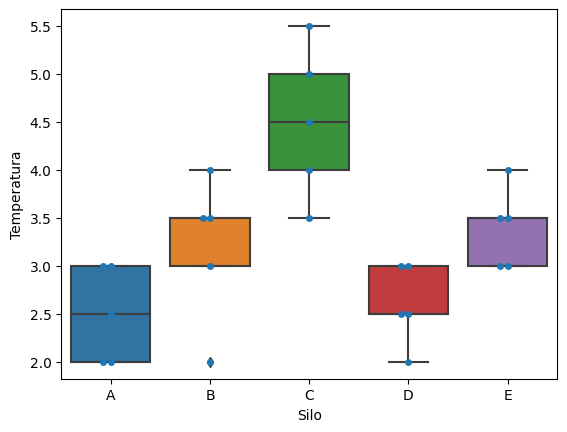

In [12]:
## **1.6 Generemos los boxplot para el desgaste con los diferentes tipos de cuero**
ax = sns.boxplot(x='Silo', y='Temperatura', data=df_melt)
ax = sns.swarmplot(x="Silo", y="Temperatura", data=df_melt)
plt.show()

# 1.7 BoxPlot para DBCA: Temperatura de almacenamiento vs Dia

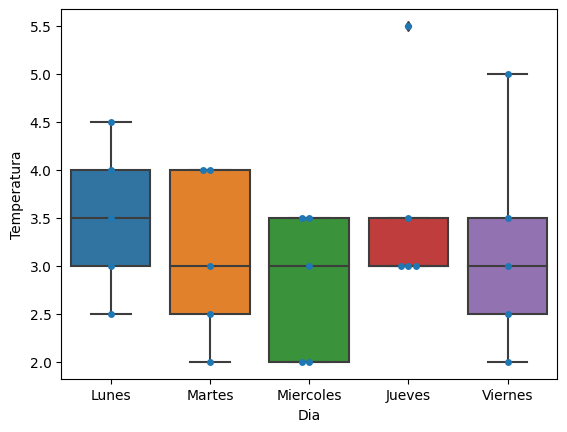

In [13]:
## **1.6 Generemos los boxplot para el desgaste con los diferentes tipos de cuero**
ax = sns.boxplot(x='Dia', y='Temperatura', data=df_melt)
ax = sns.swarmplot(x="Dia", y="Temperatura", data=df_melt)
plt.show()

## **1.7 Las funciones _stats f_oneway_ toman los grupos como entrada y devuelven el valor ANOVA F y p - value**

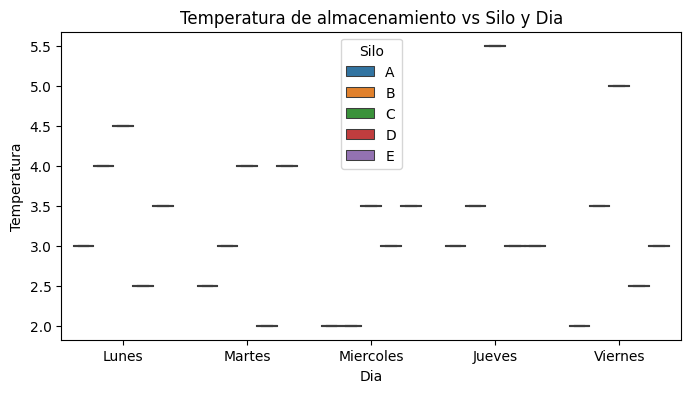

In [14]:
# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Temperatura de almacenamiento vs Silo y Dia')
sns.boxplot(x="Dia", y="Temperatura", hue='Silo', data=df_melt, ax=ax);

# **Obtener la tabla ANOVA como R como salida**

## **1.8 Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**

In [15]:

# **2.8 Análisis de Varianza Tipo II**
modeloDBCA = ols("Temperatura ~ Silo + Dia", data = df_melt).fit()
anova_result2 = sm.stats.anova_lm(modeloDBCA, typ=1)
print (anova_result2)

            df  sum_sq  mean_sq          F    PR(>F)
Silo       4.0   12.86  3.21500  10.007782  0.000297
Dia        4.0    2.06  0.51500   1.603113  0.221868
Residual  16.0    5.14  0.32125        NaN       NaN


# LSD


$LSD = t_{\alpha/2, (k-1)(b-1)}\sqrt{\frac{2CM_E}{b}} = t_{0.025, 16}\sqrt{\frac{2CM_E}{5}}$

In [16]:
#Alpha/2 =
LSD = 2.12*(2*anova_result2.mean_sq['Residual']/(anova_result2.df['Silo']+1))**(0.5)
LSD

0.7599542091468406

In [17]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("Temperatura ~ Silo + Dia", data = df_melt).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperatura   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     5.805
Date:                Fri, 03 Nov 2023   Prob (F-statistic):            0.00142
Time:                        17:59:55   Log-Likelihood:                -15.701
No. Observations:                  25   AIC:                             49.40
Df Residuals:                      16   BIC:                             60.37
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8600      0.340  

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.7,0.3773,-0.3026,1.7026,False
A,C,2.0,0.0003,0.9974,3.0026,True
A,D,0.1,0.9988,-0.9026,1.1026,False
A,E,0.9,0.1642,-0.1026,1.9026,False
B,C,1.3,0.02,0.2974,2.3026,True
B,D,-0.6,0.5254,-1.6026,0.4026,False
B,E,0.2,0.9835,-0.8026,1.2026,False
C,D,-1.9,0.0006,-2.9026,-0.8974,True
C,E,-1.1,0.0605,-2.1026,-0.0974,True
D,E,0.8,0.2552,-0.2026,1.8026,False


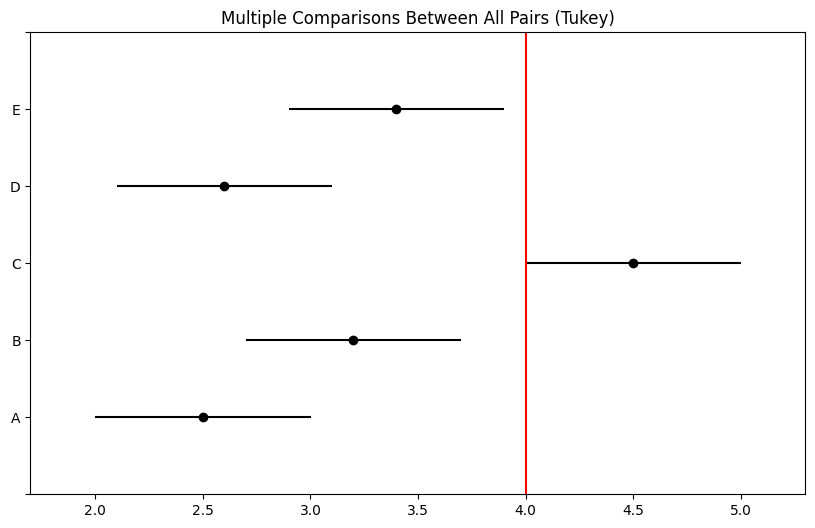

In [18]:
# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=df_melt["Temperatura"],     # Data
                          groups=df_melt["Silo"],   # Groups
                          alpha=0.1)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=4,ymax=10,ymin=-1, color="red")
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Jueves,Lunes,-0.1,0.9998,-1.6852,1.4852,False
Jueves,Martes,-0.5,0.917,-2.0852,1.0852,False
Jueves,Miercoles,-0.8,0.6746,-2.3852,0.7852,False
Jueves,Viernes,-0.4,0.9613,-1.9852,1.1852,False
Lunes,Martes,-0.4,0.9613,-1.9852,1.1852,False
Lunes,Miercoles,-0.7,0.7696,-2.2852,0.8852,False
Lunes,Viernes,-0.3,0.9864,-1.8852,1.2852,False
Martes,Miercoles,-0.3,0.9864,-1.8852,1.2852,False
Martes,Viernes,0.1,0.9998,-1.4852,1.6852,False
Miercoles,Viernes,0.4,0.9613,-1.1852,1.9852,False


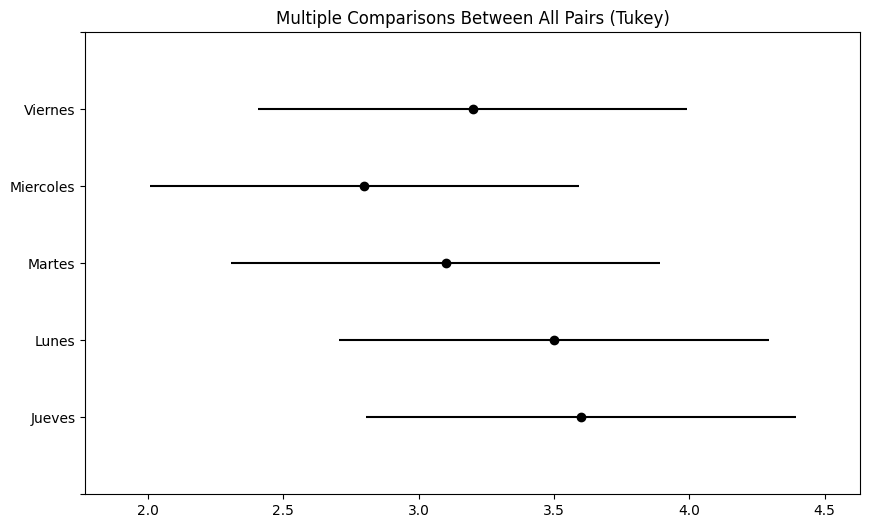

In [19]:
# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=df_melt["Temperatura"],     # Data
                          groups=df_melt["Dia"],   # Groups
                          alpha=0.1)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

In [20]:

# **3.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**
w, pvalue = stats.shapiro(modeloDBCA.resid)
print(w, pvalue)
print('Cual es el estadistico de Prueba para shapiro-wilk w = ', w)
print('El valor p para el estadistico de Prueba es p_value = ', pvalue)
print('Para que se cumpla el supuesto de normalidad se debe cumplir que el p_value = ', f'{pvalue} > 0.05')

0.9615308046340942 0.4458000361919403
Cual es el estadistico de Prueba para shapiro-wilk w =  0.9615308046340942
El valor p para el estadistico de Prueba es p_value =  0.4458000361919403
Para que se cumpla el supuesto de normalidad se debe cumplir que el p_value =  0.4458000361919403 > 0.05


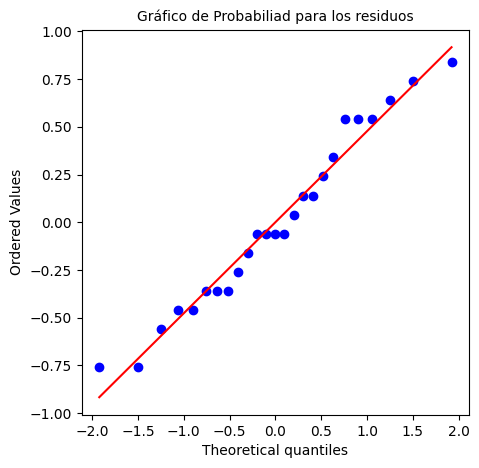

In [21]:
# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDBCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

In [22]:
# **2.14 Residuos del Modelo**
modeloDBCA.resid.describe()

count    2.500000e+01
mean     4.263256e-16
std      4.627814e-01
min     -7.600000e-01
25%     -3.600000e-01
50%     -6.000000e-02
75%      3.400000e-01
max      8.400000e-01
dtype: float64

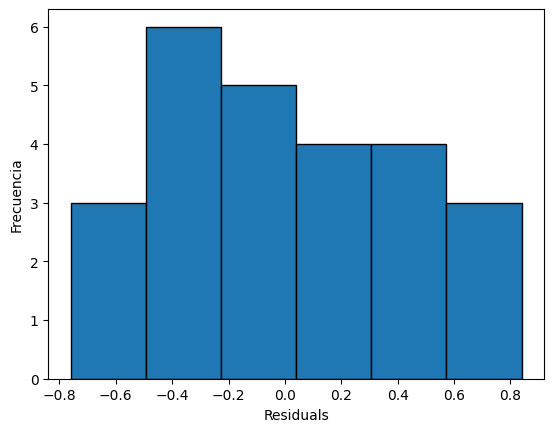

In [23]:

# **2.15 Histograma de Residuos**
plt.hist(modeloDBCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()


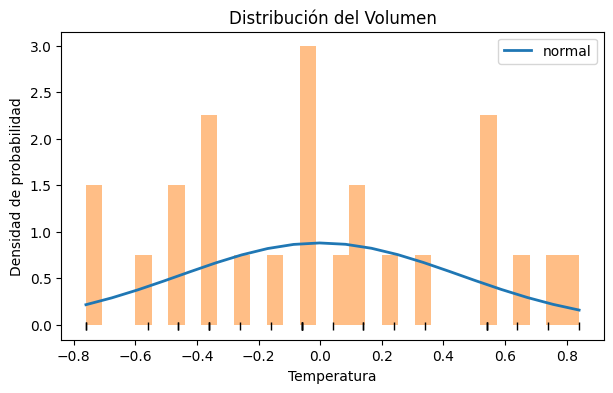

In [24]:
# **2.16 Histograma + curva normal teórica**
# ==============================================================================
Volumen = modeloDBCA.resid
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Volumen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Volumen), max(Volumen), num=20)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Volumen, density=True, bins=30,  alpha=0.5)
ax.plot(Volumen, np.full_like(Volumen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Volumen')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

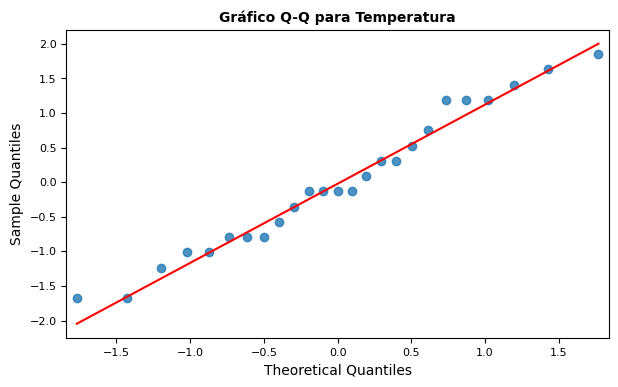

In [25]:
# **2.17 Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Volumen,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Temperatura', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

In [26]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=df_melt, res_var='Temperatura', xfac_var='Dia')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.0075
1,Degrees of freedom (Df),4.0000
2,p value,0.9087


In [27]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=df_melt, res_var='Temperatura', xfac_var='Silo')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),2.8631
1,Degrees of freedom (Df),4.0000
2,p value,0.5810


In [28]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=df_melt, res_var='Temperatura', xfac_var='Silo')
res.levene_summary
# output

,Parameter,Value
0,Test statistics (W),0.5667
1,Degrees of freedom (Df),4.0000
2,p value,0.6897


In [29]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=df_melt, res_var='Temperatura', xfac_var='Dia')
res.levene_summary
# output

,Parameter,Value
0,Test statistics (W),0.0870
1,Degrees of freedom (Df),4.0000
2,p value,0.9855
